1 Problem Statement

  The dataset used in this notebook is IPL data set which is one of the popular cricket tournments in the world.
  So in this notebook we analysed IPL data set using python packages pandas, matplotlib and seaborn.\\
  
  

In [3]:
#importing packages

import numpy as np                                                 
import pandas as pd                                                
import pandas_profiling
import matplotlib.pyplot as plt                                    
import seaborn as sns                                              
%matplotlib inline
sns.set()

from subprocess import check_output

In [4]:
#loading dataset

matches_data = pd.read_csv("/Users/reddeiahraju/Documents/ML/term1-Data Analysys with Python/EDA/Term-1-master/Data/Projects/matches.csv")

In [3]:
#information about DataSet

matches_data.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [4]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
matches_data.shape

(696, 18)

In [ ]:
#matches data set contains 696 records and 18 variables, 

In [6]:
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [5]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
#Preprofiling

pr = pandas_profiling.ProfileReport(matches_data)
pr.to_file(outputfile='Preprofile_matches_data.html')

# Preprocessing

Umpire3 column has most null values , so dropping it

In [6]:
matches_data.drop('umpire3',axis=1,inplace=True)

In [10]:
matches_data.shape

(696, 17)

Post Panda Profiling

In [11]:
pr = pandas_profiling.ProfileReport(matches_data)
pr.to_file(outputfile='Postprofile_matches_data.html')

# Questions

# 1 How many matches we’ve got in the dataset?

In [12]:
rows = matches_data.shape[0]
print(rows)

696


While each record is a match in data set total no of rocords in dataset will give no of matches in dataset.

# 2.How many seasons we’ve got in the dataset?

unique values in season will tell howmany no of seasons are there in dataset.
Matches dataset consists of 11 seasons data.

In [39]:
len(matches_data.season.unique())

11

# 3 Which Team had won by maximum runs?

In [46]:
matches_data[matches_data['win_by_runs'] == matches_data.win_by_runs.max()]['winner']

43    Mumbai Indians
Name: winner, dtype: object

# 4 Which Team had won by maximum wickets?

In [52]:
matches_data.iloc[matches_data['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

# 5 Which Team had won by (closest margin) minimum runs?

In [53]:
matches_data.iloc[matches_data['win_by_runs'].idxmin()]['winner']

'Rising Pune Supergiant'

In [55]:
matches_data.iloc[matches_data[matches_data['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

# 6 Which Team had won by minimum wickets?


In [59]:
matches_data.iloc[matches_data[matches_data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

# 7 Which season had most number of matches?

In [65]:
matches_data.groupby('season').id.count()

#by using group by and count() finding the no of matches in each season
#maximum no of matches happened in year 2013

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
Name: id, dtype: int64

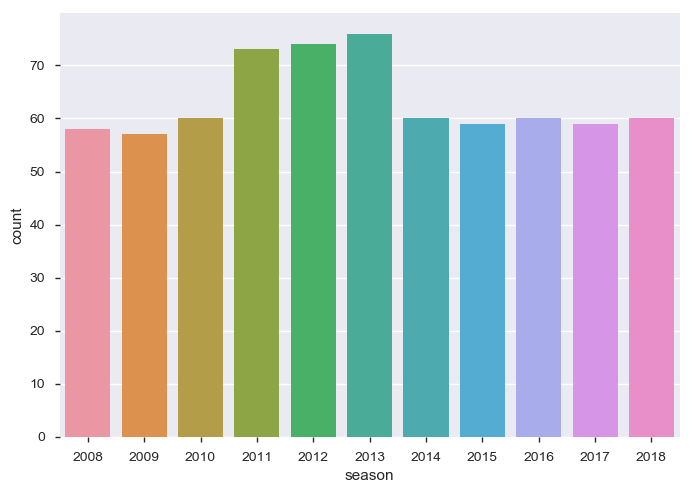

In [58]:
#plotting the match counts using seaborn countplot()

sns.countplot(x='season', data=matches_data)
plt.show()

# The most successful IPL Team

by using seaborn countplot()

<function matplotlib.pyplot.show(*args, **kw)>

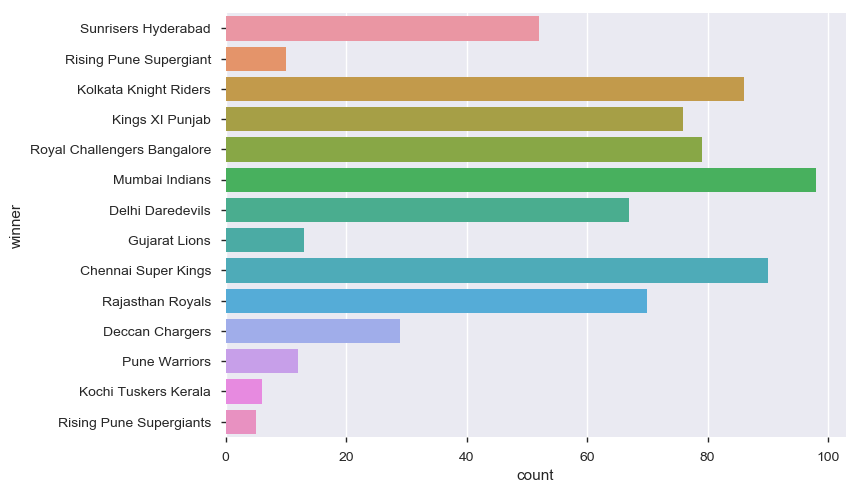

In [68]:
sns.countplot(y='winner', data = matches_data)
plt.show

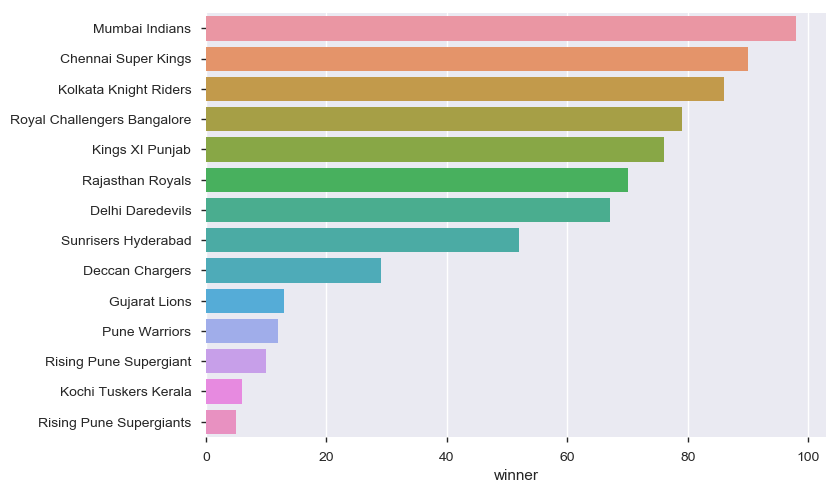

In [70]:
data = matches_data.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

# Top player of the match Winners

In [7]:
top_players = matches_data['player_of_match'].value_counts()[:10]
top_players

CH Gayle          20
AB de Villiers    18
RG Sharma         16
YK Pathan         16
DA Warner         15
MS Dhoni          14
SK Raina          14
SR Watson         13
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

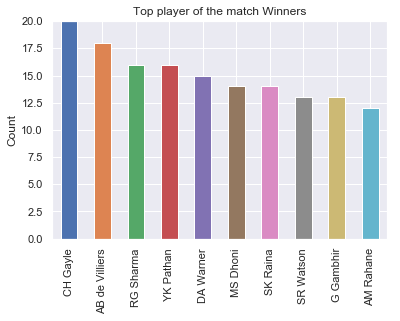

In [8]:
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()

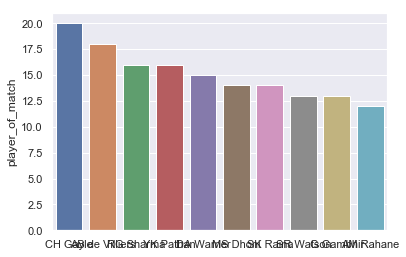

In [10]:
sns.barplot(x = top_players.index, y = top_players, orient='v'); 
plt.show()

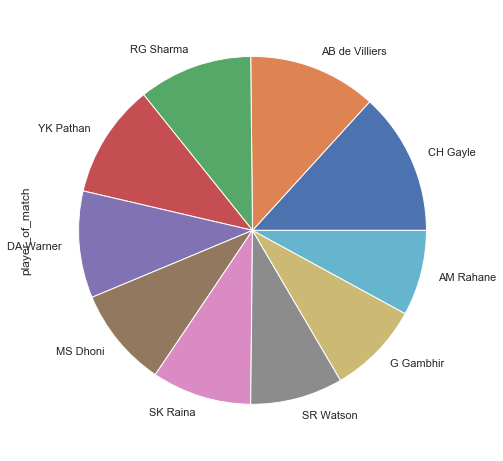

In [18]:
matches_data['player_of_match'].value_counts().head(10).plot(kind='pie', figsize=(8,8))

# Has Toss-winning helped in Match-winning?

In [23]:
tw_mw = matches_data['toss_winner'] == matches_data['winner']


if match winner and toss winner are same then considering it as success case else false to decide whether toss will play
a role in match winning

In [98]:
tw_mw.groupby(tw_mw).size()


False    339
True     357
dtype: int64

By seeing the counts , there are more True values
it looks like toss winning is helping in winning the match

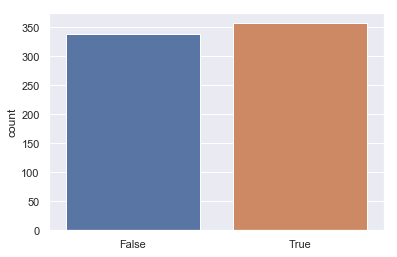

In [25]:
#plotting it using countplot()
sns.countplot(tw_mw)

In [ ]:
data = matches_data.iloc[:, 6:13]
data

Text(0.5, 1.0, 'Correlation between features')

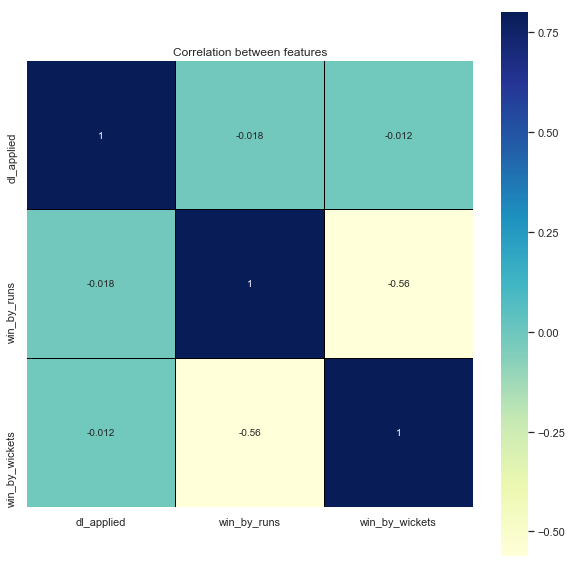

In [57]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')